# Linear Programming with Python


## What is Linear Programming?
Linear Programming, also sometimes called linear optimisation, involves maximising or minimising a linear objective function to achive the best outcome in a mathematical model subject to a set of linear inequality or equality constraints.

#### Example of a linear programming problem
A car company produces 2 models, model A and model B. Long-term projections indicate an expected demand of at least 100 model A cars and 80 model B cars each day. Because of limitations on production capacity, no more than 200 model A cars and 170 model B cars can be made daily. To satisfy a shipping contract, a total of at least 200 cars much be shipped each day. If each model A car sold results in a \$2000 loss, but each model B car produces a \$5000 profit, how many of each type should be made daily to maximize net profits?



### Formulating the above problem

So , Let us assume the number of model A sold daily be 'x' and model B is 'y' .

Daily Profit, z =  (5000*y - 2000*x) and our objective is to maximize z .

We have the following constraints:

*To satisfy Expected Demand:
    
$x\geq100$

$y\geq80$

*Limitations in production capacity:

$x\leq200$

$y\leq170$

*Shipping contract limitations :

$x+y\geq200$

Profit maximization : $ z = (5000*y - 2000*x) $

### Basic terminologies used in Linear Programming

1.Decision Variables: The variables on which the final output depends are decision variables.For the above example, the total number of units for A and B denoted by x & y respectively are my decision variables.

2.Objective Function: It is defined as the objective of making decisions. In the above example, the company wishes to increase the total profit represented by Z.

3.Constraints: Therse are those restrictions which limit the value of decision variables.In the above example, the limit on the production capacity, demands, conditions of the contract are such constraints.

4.Non-negativity restriction: For all linear programs, the decision variables should always take non-negative values. Which means the values for decision variables should be greater than or equal to 0.

### Solving above problem by Graphical Method

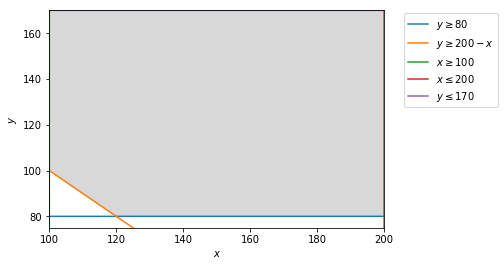

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
x = np.linspace(0, 200, 20000)
y = np.linspace(0, 200, 20000)
# y >= 80
y1 = (x*0) + 80
# y >= 200 - x
y2 = 200-x
# x >= 100 
x1 = (0*y) + 100
# x <= 200 
x2 = (0*y) + 200
# y <= 170 
y3 = (0*x) +170

# Make plot
plt.plot(x, y1, label=r'$y\geq80$')
plt.plot(x, y2, label=r'$y\geq200-x$')
plt.plot(x1, y, label=r'$x\geq100$')
plt.plot(x2, y, label=r'$x\leq200$')
plt.plot(x, y3, label=r'$y\leq170$')
plt.xlim((100, 200))
plt.ylim((75, 170))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y4 = np.maximum(y1, y2)
plt.fill_between(x, y3, y4, where=y3>y4, color='grey', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

Our solution lies somewhere in the grey feasible region in the graph above.

It has been proven that the minima and maxima of linear programming problems lie at the vertices of the feasible region. In this example, there are only 5 corners to our feasible region, so we can find the solutions for each corner to find our maximum.

The five corresponding corners and respective Z are :

|# model of A(x)|# model of A(x)| Profit(z)|
| ------------- |:-------------:| -----:|   
| 100 | 80  | $200000 |
| 100 | 170 | \$650000 |
| 120 | 80  | \$160000 |
| 200 | 80  | \$0      |
| 200 | 170 | \$45000  |

We have successfully calculated that the maximum value for Z is 650000, when x is 100 and y is 170.

This method of testing every vertex is only feasible for a small number of variables and constraints. As the numbers of constraints and variables increase, it becomes far more difficult to graph these problems and work out all the vertices. For example, if there were a third variable:

Z = Ax + By + Cz

We would have to graph in three dimensions (x, y and z).

### Solution  - (Approach 2 using PuLP)
In this approach, I'll explain how to construct and solve the linear programming problem described in approach 1 using PuLP( it is an open source linear programming package for python).

the brief of our linear programming problem:

We want to find the maximum solution to the objective function:

$z = 5000y - 2000x$

Subject to the following constraints:

$x\geq100$

$y\geq80$

$x\leq200$

$y\leq170$

$x+y\geq200$



In [115]:
import pulp
profit = pulp.LpProblem("Profit", pulp.LpMaximize)
x = pulp.LpVariable('x', lowBound=100, cat='Continuous')
y = pulp.LpVariable('y', lowBound=80, cat='Continuous')

# Objective function
profit += 5000 * y - 2000 * x, "Z"

# Constraints
profit += y >= 200 - x
profit += y <= 170
profit += x <= 200

In [116]:
profit

Profit:
MAXIMIZE
-2000*x + 5000*y + 0
SUBJECT TO
_C1: x + y >= 200

_C2: y <= 170

_C3: x <= 200

VARIABLES
100 <= x Continuous
80 <= y Continuous

In [117]:
profit.solve()
pulp.LpStatus[profit.status]

'Optimal'

In [118]:
for variable in profit.variables():
    print (variable.name, variable.varValue)

x 100.0
y 170.0


In [119]:
print (profit.objective)

-2000*x + 5000*y


In [120]:
print (-2000*100 + 5000*170)   # Maximum Profit made each day

650000
